In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
#!pip install opendatasets
#import opendatasets as od
#od.download('https://www.kaggle.com/datasets/amrragababdelaziz/dermnet-and-skin-disease-9-classes')

In [3]:
train ='/kaggle/input/dermnet-and-skin-disease-9-classes/Merged Dataset/Train'
validation_dir = '/kaggle/input/dermnet-and-skin-disease-9-classes/Merged Dataset/test'

In [4]:
import glob
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [5]:
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))
test_samples=get_files(validation_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

9 Classes
26642 Train images
2389 Test images


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
img_width,img_height =128,128
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(validation_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 26642 images belonging to 9 classes.
Found 2389 images belonging to 9 classes.


In [7]:
#od.download('https://www.kaggle.com/datasets/keras/inceptionresnetv2')

In [8]:
from keras import Model
from keras import optimizers
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D,Dense

model_i = Sequential()
model_i.add( tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights= "imagenet", input_shape=(128, 128, 3)))

model_i.add(GlobalAveragePooling2D())
model_i.add(Dense(9, activation="softmax"))
model_i.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 9)                 13833     
                                                                 
Total params: 54,350,569
Trainable params: 54,290,025
Non-trainable params: 60,544
_________________________________________________________________


In [9]:
import tensorflow as tf

# Compile the model
model_i.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='roc_auc', curve='ROC')  # Include ROC-AUC metric
    ]
)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history_i = model_i.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True)

Epoch 1/10
833/833 [==============================] - 419s 390ms/step - loss: 1.2683 - accuracy: 0.5569 - precision: 0.7869 - recall: 0.3721 - roc_auc: 0.8962 - val_loss: 2.0588 - val_accuracy: 0.3294 - val_precision: 0.4051 - val_recall: 0.2047 - val_roc_auc: 0.7583
Epoch 2/10
833/833 [==============================] - 211s 253ms/step - loss: 1.0682 - accuracy: 0.6254 - precision: 0.7944 - recall: 0.4735 - roc_auc: 0.9272 - val_loss: 1.6489 - val_accuracy: 0.4228 - val_precision: 0.5750 - val_recall: 0.2825 - val_roc_auc: 0.8288
Epoch 3/10
833/833 [==============================] - 209s 251ms/step - loss: 0.9829 - accuracy: 0.6594 - precision: 0.8009 - recall: 0.5268 - roc_auc: 0.9388 - val_loss: 1.7161 - val_accuracy: 0.4211 - val_precision: 0.5334 - val_recall: 0.2507 - val_roc_auc: 0.8184
Epoch 4/10
833/833 [==============================] - 210s 252ms/step - loss: 0.8432 - accuracy: 0.7065 - precision: 0.8184 - recall: 0.5982 - roc_auc: 0.9544 - val_loss: 1.4079 - val_accuracy: 0.

75/75 [==============================] - 11s 110ms/step


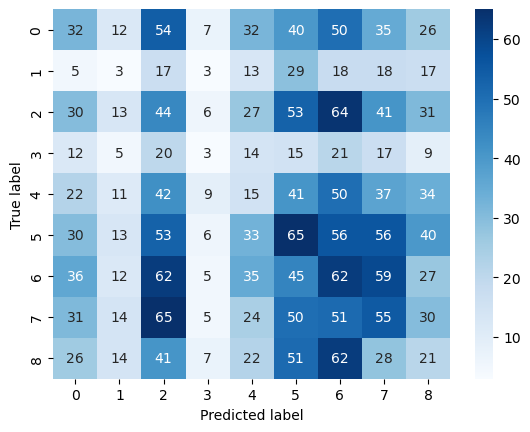

In [ ]:
predictions = model_i.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [13]:
predictions = model_i.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

75/75 [==============================] - 9s 115ms/step
                                                                    precision    recall  f1-score   support

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.15      0.12      0.13       288
                                          Atopic Dermatitis Photos       0.09      0.07      0.08       123
                                                     Eczema Photos       0.12      0.15      0.13       309
                               Melanoma Skin Cancer Nevi and Moles       0.02      0.01      0.01       116
                                Nail Fungus and other Nail Disease       0.13      0.10      0.11       261
             Psoriasis pictures Lichen Planus and related diseases       0.13      0.15      0.14       352
                      Seborrheic Keratoses and other Benign Tumors       0.15      0.18      0.16       343
            Tinea Ringworm Candidiasis and other Fungal Infections       0.14   

In [14]:
# model.save('inceptionresnetv2_model.h5')

In [15]:
img = '/kaggle/input/dermnet-and-skin-disease-9-classes/Merged Dataset/test/Nail Fungus and other Nail Disease/acute-paronychia-26.jpg'

In [18]:
def predict_disease(test_image):
  img = cv2.imread(test_image)
  img = img / 255.0
  img = cv2.resize(img, (128, 128))
  img = img.reshape(1,128, 128,3)
  prediction = model_i.predict(img)
  pred_class = np.argmax(prediction, axis = -1)
  return pred_class

In [19]:
pred=predict_disease(img)
d=pred[0]

1/1 [==============================] - 4s 4s/step


In [20]:
skin_conditions = [    "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions",    "Atopic Dermatitis Photos",    "Eczema Photos",    "Melanoma Skin Cancer Nevi and Moles",    "Nail Fungus and other Nail Disease",    "Psoriasis pictures Lichen Planus and related diseases",    "Seborrheic Keratoses and other Benign Tumors",    "Tinea Ringworm Candidiasis and other Fungal Infections",    "Warts Molluscum and other Viral Infections"]


In [21]:
skin_conditions[d]

'Psoriasis pictures Lichen Planus and related diseases'

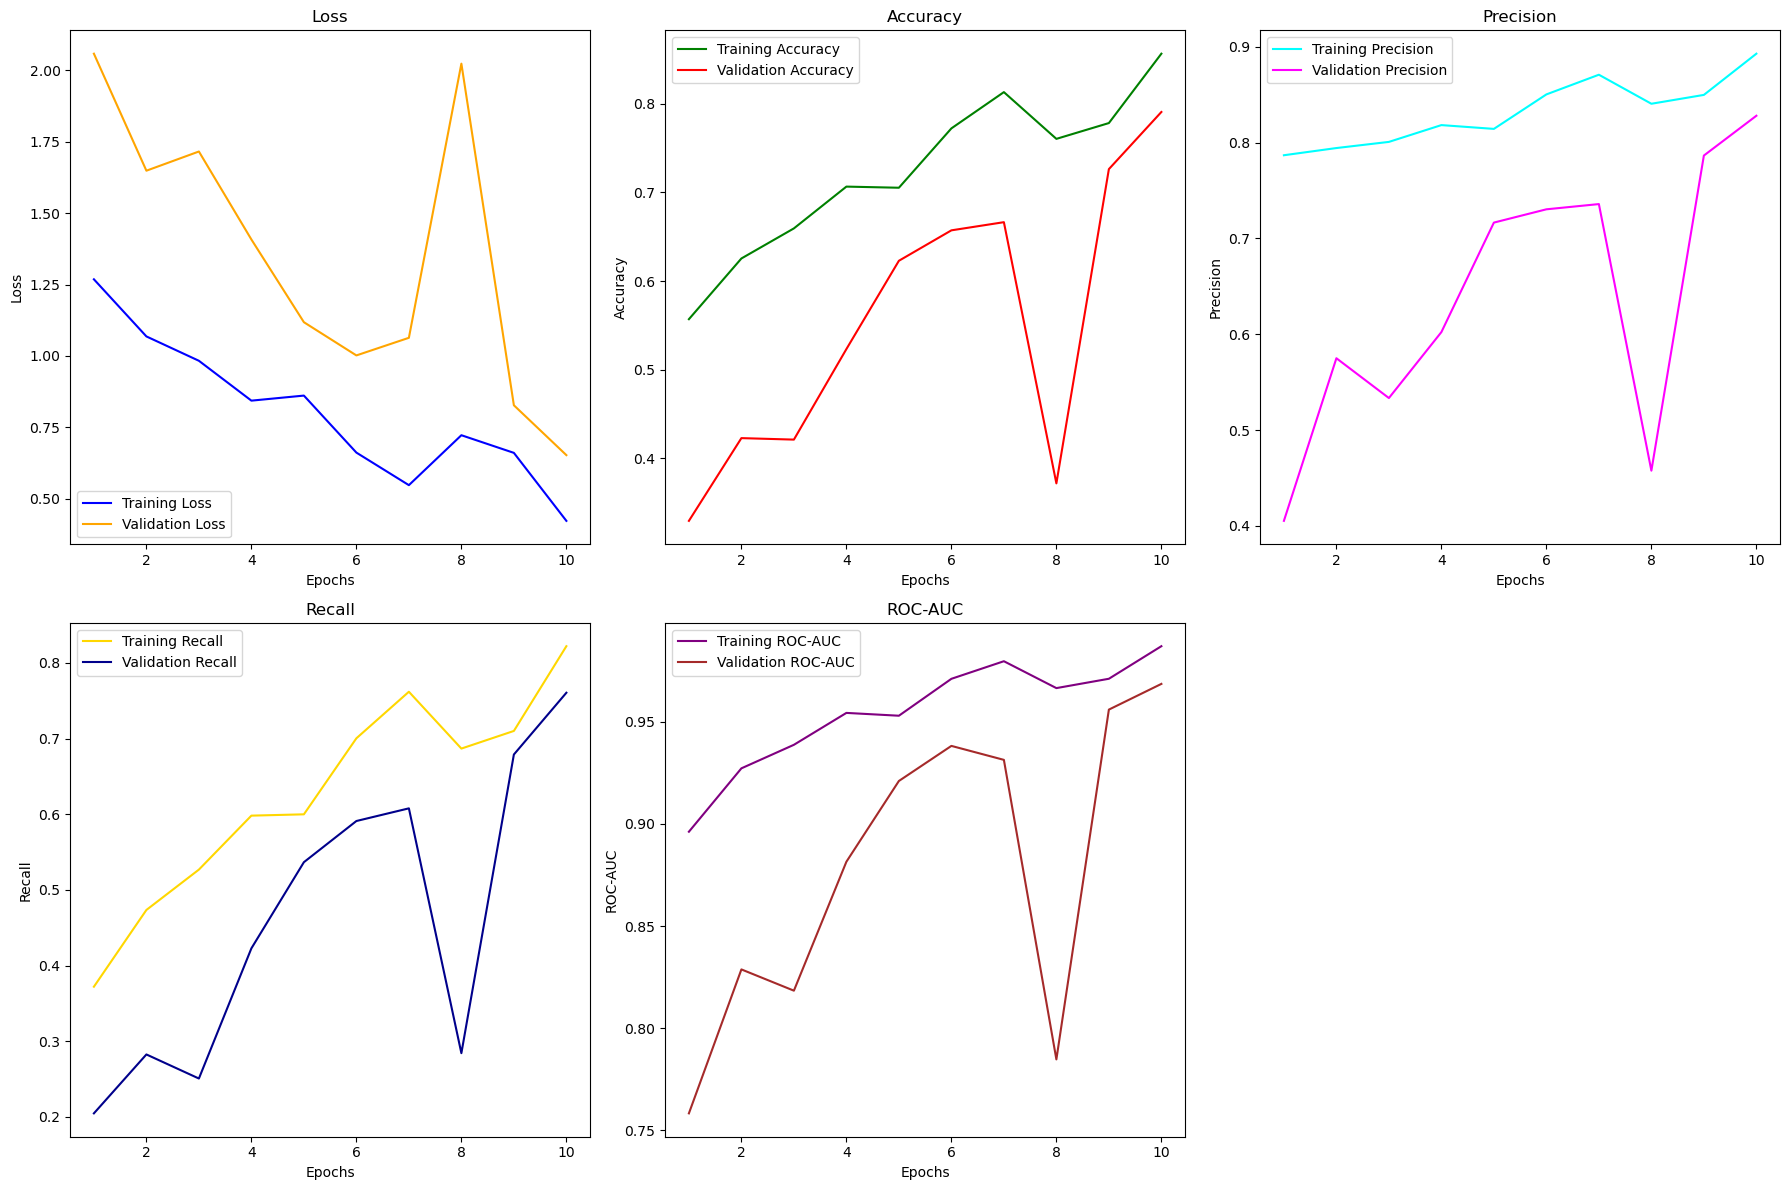

In [22]:
import matplotlib.pyplot as plt

def plot_training_metrics_with_details(history):
    """
    Plots training and validation metrics including loss, accuracy, precision, recall, and ROC-AUC.
    """
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(18, 12))

    # Plot Loss
    plt.subplot(2, 3, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(2, 3, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='green')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Precision
    if 'precision' in history.history and 'val_precision' in history.history:
        plt.subplot(2, 3, 3)
        plt.plot(epochs, history.history['precision'], label='Training Precision', color='cyan')
        plt.plot(epochs, history.history['val_precision'], label='Validation Precision', color='magenta')
        plt.title('Precision')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.legend()

    # Plot Recall
    if 'recall' in history.history and 'val_recall' in history.history:
        plt.subplot(2, 3, 4)
        plt.plot(epochs, history.history['recall'], label='Training Recall', color='gold')
        plt.plot(epochs, history.history['val_recall'], label='Validation Recall', color='darkblue')
        plt.title('Recall')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.legend()

    # Plot ROC-AUC
    if 'roc_auc' in history.history and 'val_roc_auc' in history.history:
        plt.subplot(2, 3, 5)
        plt.plot(epochs, history.history['roc_auc'], label='Training ROC-AUC', color='purple')
        plt.plot(epochs, history.history['val_roc_auc'], label='Validation ROC-AUC', color='brown')
        plt.title('ROC-AUC')
        plt.xlabel('Epochs')
        plt.ylabel('ROC-AUC')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the updated function
plot_training_metrics_with_details(history_i)

# 2nd experiment using densenet model =====================================

In [23]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import DenseNet201

# Create the DenseNet-based model
model_ii = Sequential()

# Add DenseNet base model
model_ii.add(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
))

# Add Global Average Pooling layer
model_ii.add(GlobalAveragePooling2D())

# Add output layer for 9 classes
model_ii.add(Dense(9, activation="softmax"))

# Display model summary
model_ii.summary()


74836368/74836368 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 9)                 17289     
                                                                 
Total params: 18,339,273
Trainable params: 18,110,217
Non-trainable params: 229,056
_________________________________________________________________


In [25]:
import tensorflow as tf

# Compile the model
model_ii.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='roc_auc', curve='ROC')  # Include ROC-AUC metric
    ]
)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history_ii = model_ii.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True)

Epoch 1/10
833/833 [==============================] - 333s 264ms/step - loss: 1.4513 - accuracy: 0.4777 - precision: 0.7600 - recall: 0.2878 - roc_auc: 0.8618 - val_loss: 1.9338 - val_accuracy: 0.3638 - val_precision: 0.5071 - val_recall: 0.2093 - val_roc_auc: 0.7736
Epoch 2/10
833/833 [==============================] - 210s 251ms/step - loss: 1.2014 - accuracy: 0.5677 - precision: 0.7703 - recall: 0.3987 - roc_auc: 0.9068 - val_loss: 2.3677 - val_accuracy: 0.3717 - val_precision: 0.4595 - val_recall: 0.2302 - val_roc_auc: 0.7527
Epoch 3/10
833/833 [==============================] - 209s 251ms/step - loss: 1.1336 - accuracy: 0.5937 - precision: 0.7811 - recall: 0.4313 - roc_auc: 0.9176 - val_loss: 1.7326 - val_accuracy: 0.4148 - val_precision: 0.4872 - val_recall: 0.3106 - val_roc_auc: 0.8329
Epoch 4/10
833/833 [==============================] - 211s 254ms/step - loss: 0.9973 - accuracy: 0.6452 - precision: 0.8000 - recall: 0.5050 - roc_auc: 0.9361 - val_loss: 1.6307 - val_accuracy: 0.

75/75 [==============================] - 10s 104ms/step


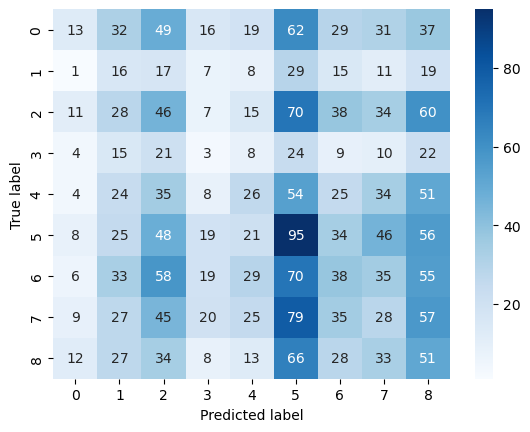

In [26]:
predictions = model_ii.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [27]:
predictions = model_ii.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

75/75 [==============================] - 8s 109ms/step
                                                                    precision    recall  f1-score   support

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.09      0.02      0.03       288
                                          Atopic Dermatitis Photos       0.04      0.07      0.05       123
                                                     Eczema Photos       0.16      0.18      0.17       309
                               Melanoma Skin Cancer Nevi and Moles       0.07      0.07      0.07       116
                                Nail Fungus and other Nail Disease       0.11      0.07      0.08       261
             Psoriasis pictures Lichen Planus and related diseases       0.17      0.26      0.20       352
                      Seborrheic Keratoses and other Benign Tumors       0.18      0.13      0.15       343
            Tinea Ringworm Candidiasis and other Fungal Infections       0.16   

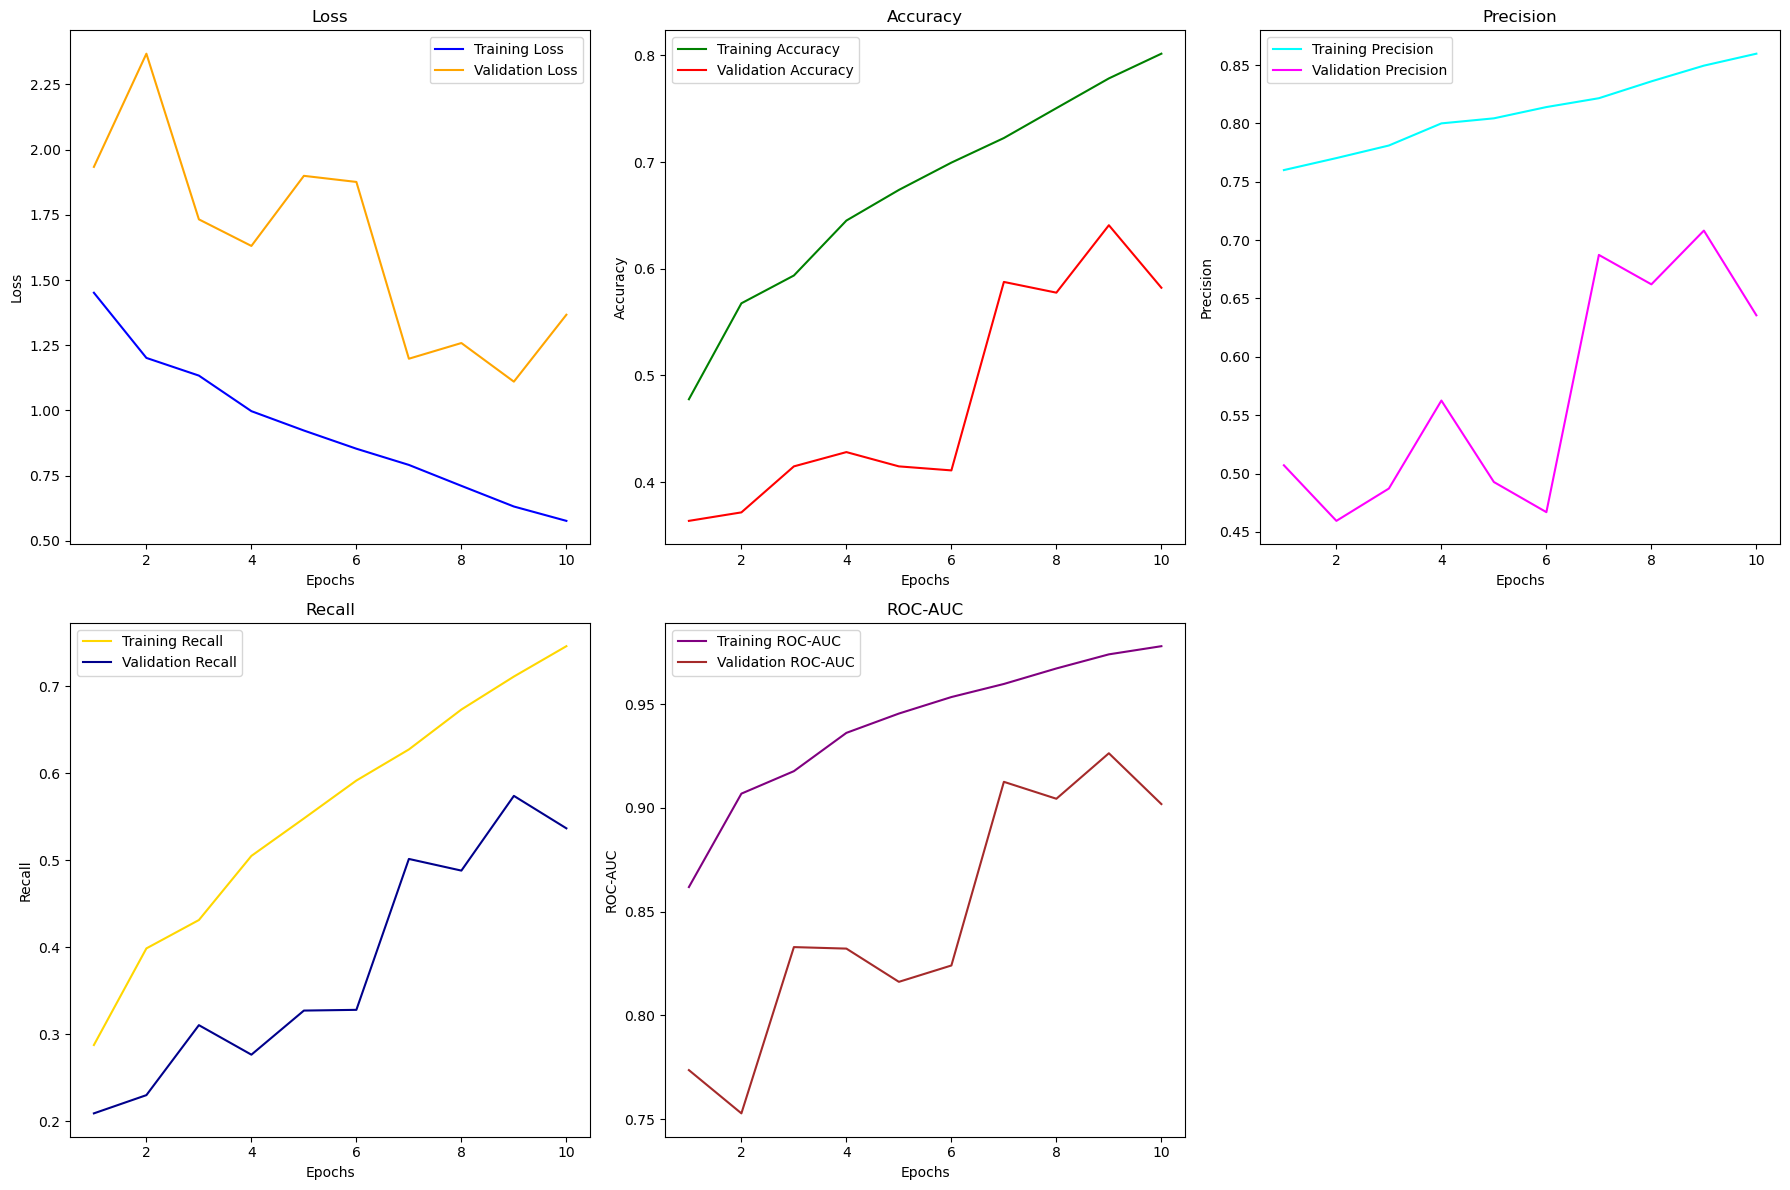

In [28]:
plot_training_metrics_with_details(history_ii)

# model iii mobilenet 

In [29]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2

# Create the MobileNet-based model
model_iii = Sequential()

# Add MobileNet base model
model_iii.add(MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
))

# Add Global Average Pooling layer
model_iii.add(GlobalAveragePooling2D())

# Add output layer for 9 classes
model_iii.add(Dense(9, activation="softmax"))

# Display model summary
model_iii.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 9)                 11529     
                                                                 
Total params: 2,269,513
Trainable params: 2,235,401
Non-trainable params: 34,112
_________________________________________________________________


In [30]:
import tensorflow as tf

# Compile the model
model_iii.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='roc_auc', curve='ROC')  # Include ROC-AUC metric
    ]
)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history_iii = model_iii.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True)

Epoch 1/10
833/833 [==============================] - 226s 239ms/step - loss: 1.2963 - accuracy: 0.5431 - precision: 0.7660 - recall: 0.3685 - roc_auc: 0.8913 - val_loss: 8.1184 - val_accuracy: 0.1113 - val_precision: 0.1119 - val_recall: 0.1101 - val_roc_auc: 0.5228
Epoch 2/10
833/833 [==============================] - 197s 236ms/step - loss: 1.0658 - accuracy: 0.6221 - precision: 0.7916 - recall: 0.4671 - roc_auc: 0.9267 - val_loss: 4.5457 - val_accuracy: 0.2005 - val_precision: 0.2130 - val_recall: 0.1783 - val_roc_auc: 0.6000
Epoch 3/10
833/833 [==============================] - 196s 235ms/step - loss: 0.9752 - accuracy: 0.6539 - precision: 0.7982 - recall: 0.5183 - roc_auc: 0.9390 - val_loss: 6.6168 - val_accuracy: 0.1792 - val_precision: 0.1813 - val_recall: 0.1729 - val_roc_auc: 0.5508
Epoch 4/10
833/833 [==============================] - 192s 231ms/step - loss: 0.9117 - accuracy: 0.6811 - precision: 0.8040 - recall: 0.5582 - roc_auc: 0.9466 - val_loss: 4.1192 - val_accuracy: 0.

75/75 [==============================] - 8s 103ms/step


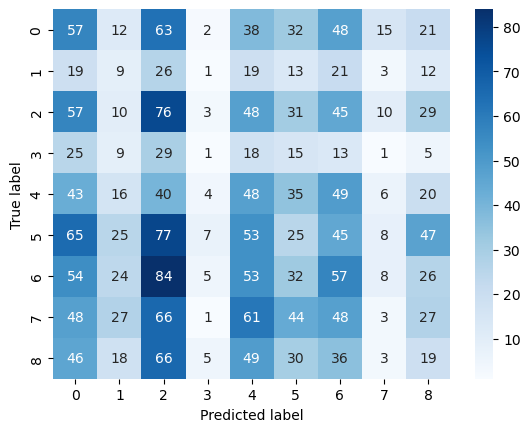

In [ ]:
predictions = model_iii.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [32]:
predictions = model_iii.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

75/75 [==============================] - 8s 106ms/step
                                                                    precision    recall  f1-score   support

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.11      0.16      0.13       288
                                          Atopic Dermatitis Photos       0.05      0.07      0.06       123
                                                     Eczema Photos       0.13      0.22      0.16       309
                               Melanoma Skin Cancer Nevi and Moles       0.07      0.02      0.03       116
                                Nail Fungus and other Nail Disease       0.13      0.20      0.16       261
             Psoriasis pictures Lichen Planus and related diseases       0.19      0.14      0.16       352
                      Seborrheic Keratoses and other Benign Tumors       0.14      0.15      0.14       343
            Tinea Ringworm Candidiasis and other Fungal Infections       0.16   

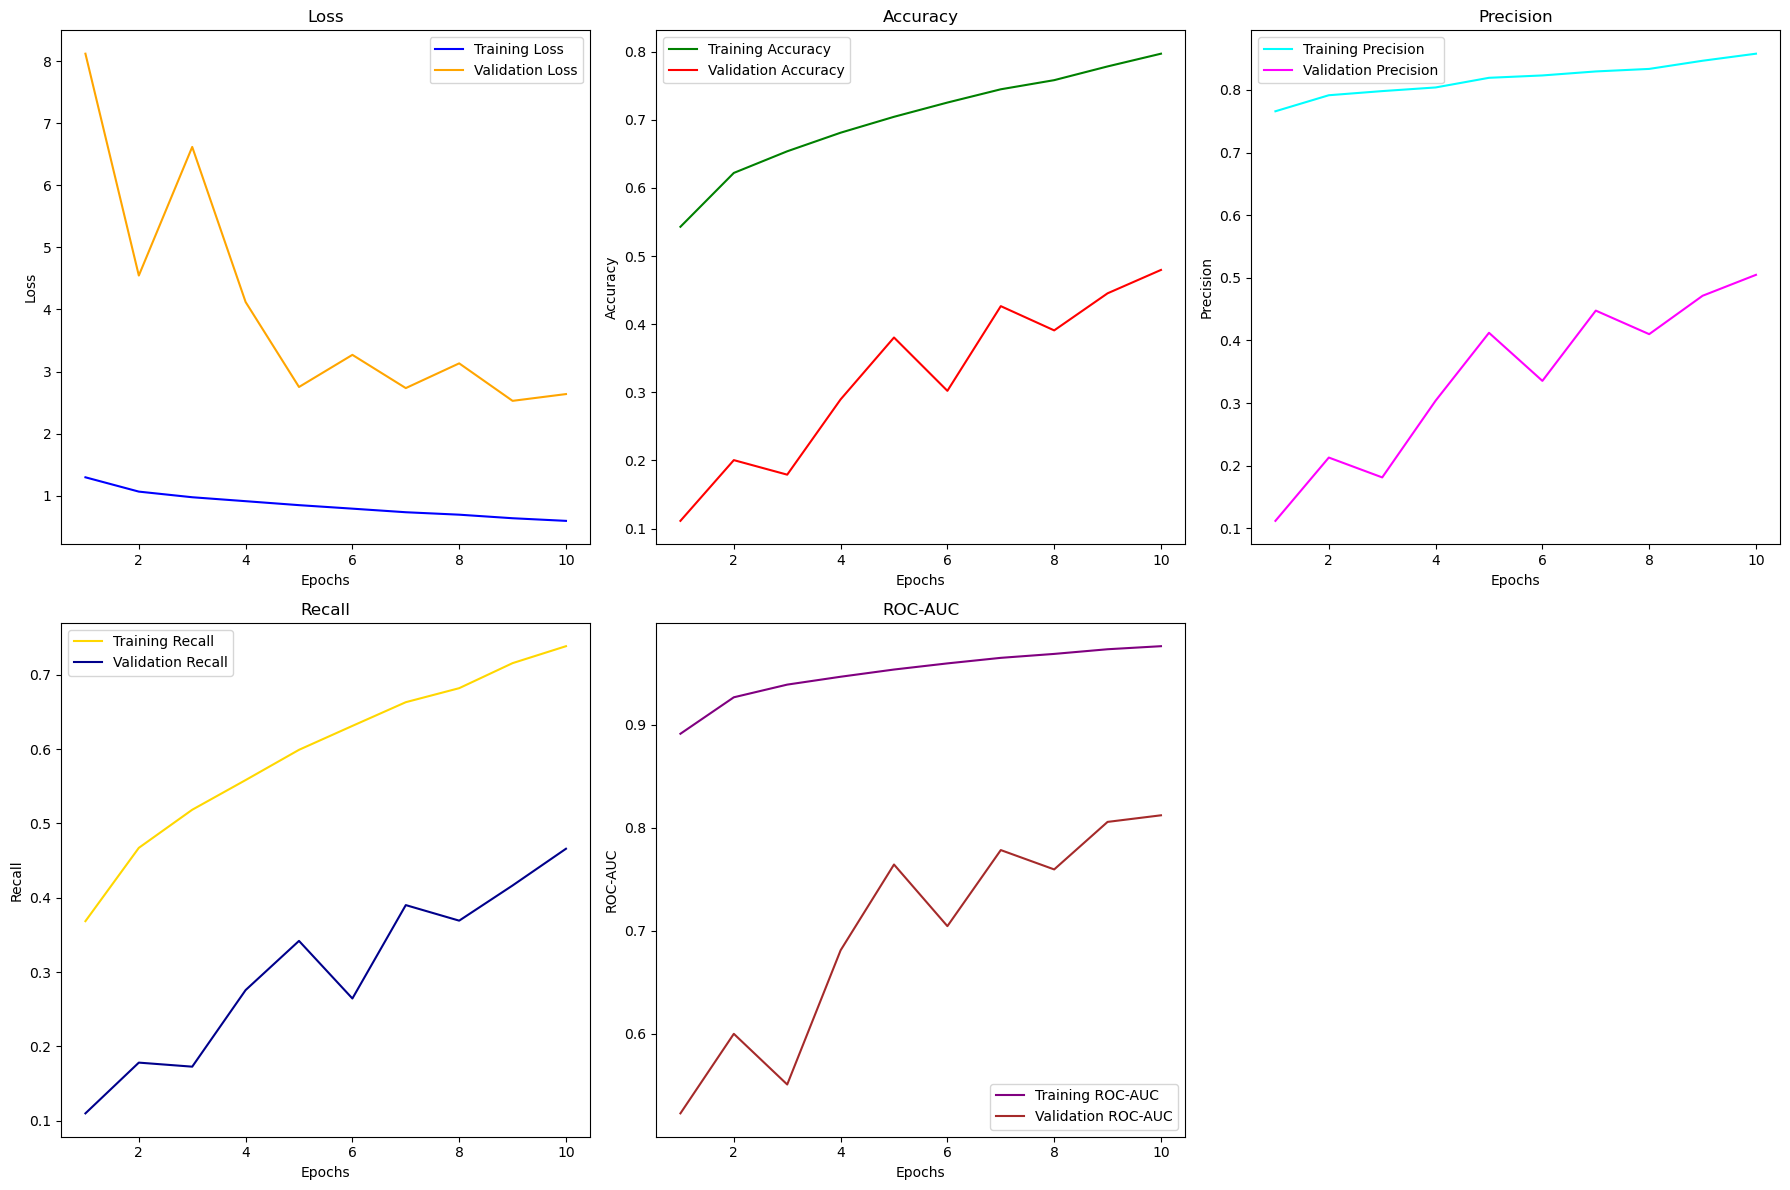

In [33]:
plot_training_metrics_with_details(history_iii)

## efficient net

In [34]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import EfficientNetB0

# Create the EfficientNet-based model
model_iv = Sequential()

# Add EfficientNet base model
model_iv.add(EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
))

# Add Global Average Pooling layer
model_iv.add(GlobalAveragePooling2D())

# Add output layer for 9 classes
model_iv.add(Dense(9, activation="softmax"))

# Display model summary
model_iv.summary()


16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 9)                 11529     
                                                                 
Total params: 4,061,100
Trainable params: 4,019,077
Non-trainable params: 42,023
_________________________________________________________________


In [35]:
import tensorflow as tf

# Compile the model
model_iv.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='roc_auc', curve='ROC')  # Include ROC-AUC metric
    ]
)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history_iv = model_iv.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True)

Epoch 1/10


2024-12-09 15:26:05.026471: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


833/833 [==============================] - 240s 242ms/step - loss: 1.2438 - accuracy: 0.5596 - precision: 0.7665 - recall: 0.3904 - roc_auc: 0.8990 - val_loss: 2.5531 - val_accuracy: 0.0515 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_roc_auc: 0.4799
Epoch 2/10
833/833 [==============================] - 201s 241ms/step - loss: 0.9541 - accuracy: 0.6637 - precision: 0.7972 - recall: 0.5391 - roc_auc: 0.9415 - val_loss: 3.4292 - val_accuracy: 0.1139 - val_precision: 0.2190 - val_recall: 0.0096 - val_roc_auc: 0.4724
Epoch 3/10
833/833 [==============================] - 200s 240ms/step - loss: 0.8040 - accuracy: 0.7230 - precision: 0.8208 - recall: 0.6275 - roc_auc: 0.9580 - val_loss: 3.7115 - val_accuracy: 0.0615 - val_precision: 0.0244 - val_recall: 8.3717e-04 - val_roc_auc: 0.4698
Epoch 4/10
833/833 [==============================] - 201s 241ms/step - loss: 0.5965 - accuracy: 0.7937 - precision: 0.8579 - recall: 0.7361 - roc_auc: 0.9760 - val_loss: 4.3551 - val_accuracy: 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



833/833 [==============================] - 201s 242ms/step - loss: 0.3640 - accuracy: 0.8763 - precision: 0.9035 - recall: 0.8493 - roc_auc: 0.9901 - val_loss: 3.4252 - val_accuracy: 0.1319 - val_precision: 0.1520 - val_recall: 0.0536 - val_roc_auc: 0.5033
Epoch 10/10
833/833 [==============================] - 201s 241ms/step - loss: 0.3224 - accuracy: 0.8878 - precision: 0.9114 - recall: 0.8670 - roc_auc: 0.9917 - val_loss: 5.2400 - val_accuracy: 0.1452 - val_precision: 0.1542 - val_recall: 0.1235 - val_roc_auc: 0.5463


75/75 [==============================] - 9s 109ms/step


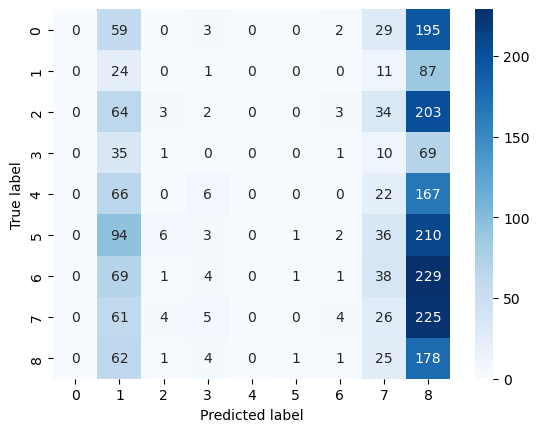

In [36]:
predictions = model_iv.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [37]:
predictions = model_iv.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

75/75 [==============================] - 8s 110ms/step
                                                                    precision    recall  f1-score   support

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.06      0.25      0.09       123
                                                     Eczema Photos       0.06      0.00      0.01       309
                               Melanoma Skin Cancer Nevi and Moles       0.00      0.00      0.00       116
                                Nail Fungus and other Nail Disease       0.00      0.00      0.00       261
             Psoriasis pictures Lichen Planus and related diseases       0.00      0.00      0.00       352
                      Seborrheic Keratoses and other Benign Tumors       0.21      0.01      0.02       343
            Tinea Ringworm Candidiasis and other Fungal Infections       0.15   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


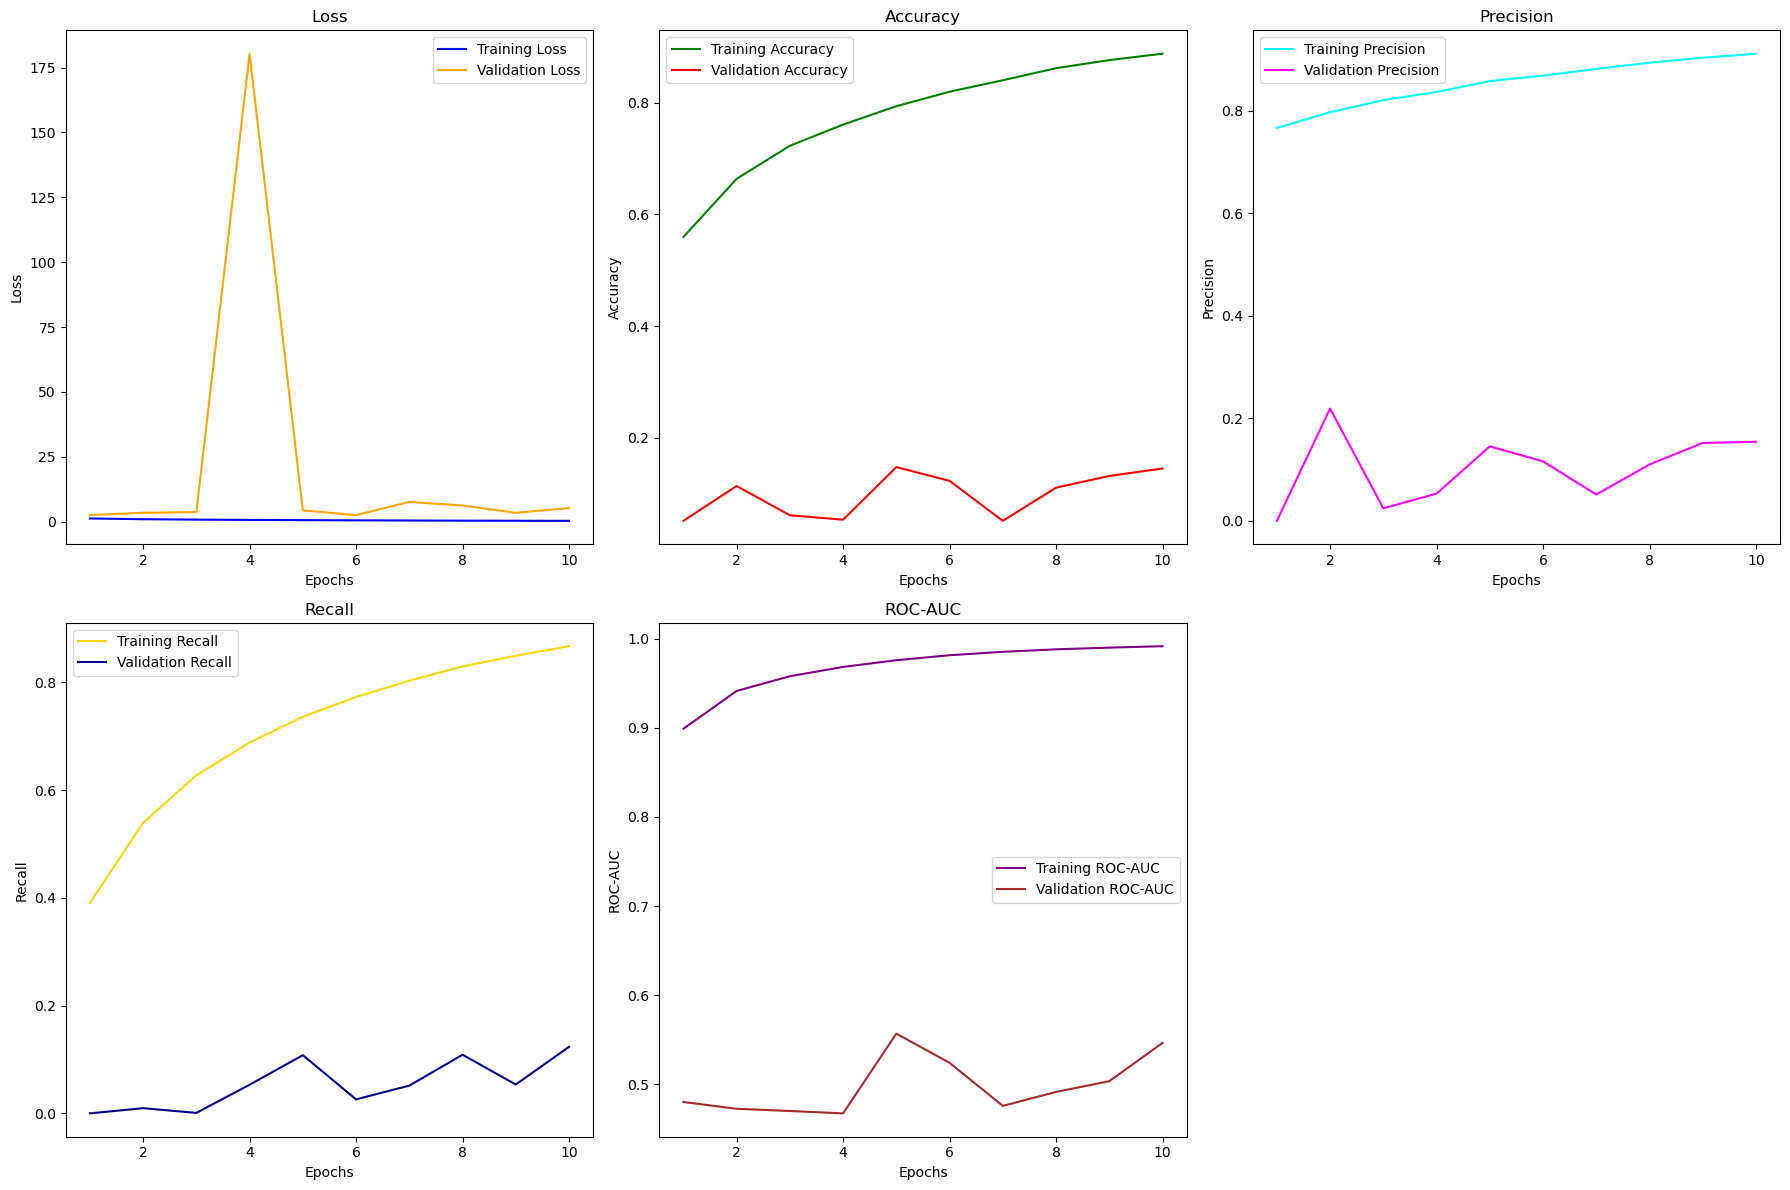

In [38]:
plot_training_metrics_with_details(history_iv)

In [39]:
import os

def count_images_in_folders(directory):
    """
    Counts the number of images in each folder within a given directory.

    Args:
        directory (str): Path to the directory containing subfolders of images.

    Returns:
        dict: A dictionary where keys are folder names and values are image counts.
    """
    folder_image_count = {}

    # Loop through each folder in the directory
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        
        # Ensure the path is a folder
        if os.path.isdir(folder_path):
            # Count the number of files in the folder
            num_images = len([
                file for file in os.listdir(folder_path) 
                if os.path.isfile(os.path.join(folder_path, file)) and file.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            folder_image_count[folder_name] = num_images

    return folder_image_count

# Example usage
directory = "/kaggle/input/dermnet-and-skin-disease-9-classes/Merged Dataset/Train"
folder_counts = count_images_in_folders(directory)

# Print the counts
for folder, count in folder_counts.items():
    print(f"Folder: {folder}, Number of images: {count}")

Folder: Atopic Dermatitis Photos, Number of images: 1746
Folder: Tinea Ringworm Candidiasis and other Fungal Infections, Number of images: 3002
Folder: Psoriasis pictures Lichen Planus and related diseases, Number of images: 3460
Folder: Melanoma Skin Cancer Nevi and Moles, Number of images: 3603
Folder: Nail Fungus and other Nail Disease, Number of images: 1040
Folder: Eczema Photos, Number of images: 2912
Folder: Seborrheic Keratoses and other Benign Tumors, Number of images: 3218
Folder: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions, Number of images: 4472
Folder: Warts Molluscum and other Viral Infections, Number of images: 3189


In [40]:
directory = "/kaggle/input/dermnet-and-skin-disease-9-classes/Merged Dataset/test"
folder_counts = count_images_in_folders(directory)

# Print the counts
for folder, count in folder_counts.items():
    print(f"Folder: {folder}, Number of images: {count}")

Folder: Atopic Dermatitis Photos, Number of images: 123
Folder: Tinea Ringworm Candidiasis and other Fungal Infections, Number of images: 325
Folder: Psoriasis pictures Lichen Planus and related diseases, Number of images: 352
Folder: Melanoma Skin Cancer Nevi and Moles, Number of images: 116
Folder: Nail Fungus and other Nail Disease, Number of images: 261
Folder: Eczema Photos, Number of images: 309
Folder: Seborrheic Keratoses and other Benign Tumors, Number of images: 343
Folder: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions, Number of images: 288
Folder: Warts Molluscum and other Viral Infections, Number of images: 272
